In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_csv('grb_table.txt', sep='\t')

In [4]:
df

,GRB,Time [UT],Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90 [sec],BAT Fluence (15-150 keV) [10^-7 erg/cm^2],XRT RA (J2000),XRT Dec (J2000),XRT Time to First Observation [sec],XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s],UVOT RA (J2000),UVOT Dec (J2000),UVOT Time to First Observation [sec],UVOT Magnitude,Other Observatory Detections,Redshift,Host Galaxy,Comments,References
0,241128A,16:14:34,1270999,273.724,33.492,238.32,11,18:14:53.72,33:26:20.9,118.05,NaN,NaN,NaN,3880,V>19.0,"OSN (1.5m), LCO (1m), NOT, GRANDMA & Kilonova-...",NaN,NaN,UVOT: no detection,NaN
1,241127A,21:43:16,1270788,327.911,-56.652,26.02,6.5,21:51:32.50,-56:39:55.9,66.63,212,21:51:32.32,-56:39:55.1,484,V=19.7,"MASTER-SAAO, MASTER-OAFA, LCOGT (40-cm), SVOM/...",NaN,NaN,NaN,NaN
2,241115A,13:18:25,1267921,86.765,-0.662,NaN,NaN,05:47:05.03,-00:40:28.6,109.50,NaN,NaN,NaN,113,NaN,"Fermi (GBM), CALET (CGBM), ATCA @ 9 GHz",NaN,NaN,NaN,NaN
3,241113A,07:48:13,1267501,16.578,-22.658,1.7,1.3,01:06:15.68,-22:40:18.1,77.21,NaN,01:06:15.64,-22:40:18.4,61,V=14.97,"MASTER, LCOGT (40-cm), LCO (1m, 0.4m), REM (60...",NaN,NaN,NaN,NaN
4,241112B,10:57:21,SVOM-ECLAIRs,29.055,9.146,NaN,NaN,01:56:09.39,09:06:27.2,11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SVOM-ECLAIRs: GCN 38173,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,041220,22:58:27,100433,291.288,60.598,5.600,3.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAT: FRED|No AT slew|XRT: no observation|UVOT:...,NaN
1887,041219C,20:30:34,100380*,343.926,-76.744,4.800,13.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BAT: 3 spikes|No AT slew|XRT: no observation|U...,NaN
1888,041219B,15:38:48,100367*,167.674,-33.458,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IPN,NaN,NaN,"BAT: 1 big spike, 3 little spikes|No AT slew|X...",NaN
1889,041219A,01:42:18,100307|100319,6.154,62.847,520,1550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BAT: bright, long, multipeaked|No AT slew|XRT:...",NaN


In [5]:
df.rename(columns={'BAT Fluence (15-150 keV) [10^-7 erg/cm^2]':'bat_fluence'}, inplace=True)

In [6]:
df['date'] = df['GRB'].apply(lambda x: re.search(r'\d{6}', x).group(0))

In [7]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

/tmp/ipykernel_32166/5881665.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], yearfirst=True)


In [8]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.weekday
df['year'] = df['date'].dt.year
df['day_year'] = df['date'].dt.day_of_year

In [9]:
df

,GRB,Time [UT],Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90 [sec],bat_fluence,XRT RA (J2000),XRT Dec (J2000),XRT Time to First Observation [sec],...,Redshift,Host Galaxy,Comments,References,date,day,month,week,year,day_year
0,241128A,16:14:34,1270999,273.724,33.492,238.32,11,18:14:53.72,33:26:20.9,118.05,...,NaN,NaN,UVOT: no detection,NaN,2024-11-28,28,11,3,2024,333
1,241127A,21:43:16,1270788,327.911,-56.652,26.02,6.5,21:51:32.50,-56:39:55.9,66.63,...,NaN,NaN,NaN,NaN,2024-11-27,27,11,2,2024,332
2,241115A,13:18:25,1267921,86.765,-0.662,NaN,NaN,05:47:05.03,-00:40:28.6,109.50,...,NaN,NaN,NaN,NaN,2024-11-15,15,11,4,2024,320
3,241113A,07:48:13,1267501,16.578,-22.658,1.7,1.3,01:06:15.68,-22:40:18.1,77.21,...,NaN,NaN,NaN,NaN,2024-11-13,13,11,2,2024,318
4,241112B,10:57:21,SVOM-ECLAIRs,29.055,9.146,NaN,NaN,01:56:09.39,09:06:27.2,11000,...,NaN,NaN,SVOM-ECLAIRs: GCN 38173,NaN,2024-11-12,12,11,1,2024,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,041220,22:58:27,100433,291.288,60.598,5.600,3.83,NaN,NaN,NaN,...,NaN,NaN,BAT: FRED|No AT slew|XRT: no observation|UVOT:...,NaN,2004-12-20,20,12,0,2004,355
1887,041219C,20:30:34,100380*,343.926,-76.744,4.800,13.10,NaN,NaN,NaN,...,NaN,NaN,BAT: 3 spikes|No AT slew|XRT: no observation|U...,NaN,2004-12-19,19,12,6,2004,354
1888,041219B,15:38:48,100367*,167.674,-33.458,30,NaN,NaN,NaN,NaN,...,NaN,NaN,"BAT: 1 big spike, 3 little spikes|No AT slew|X...",NaN,2004-12-19,19,12,6,2004,354
1889,041219A,01:42:18,100307|100319,6.154,62.847,520,1550,NaN,NaN,NaN,...,NaN,NaN,"BAT: bright, long, multipeaked|No AT slew|XRT:...",NaN,2004-12-19,19,12,6,2004,354


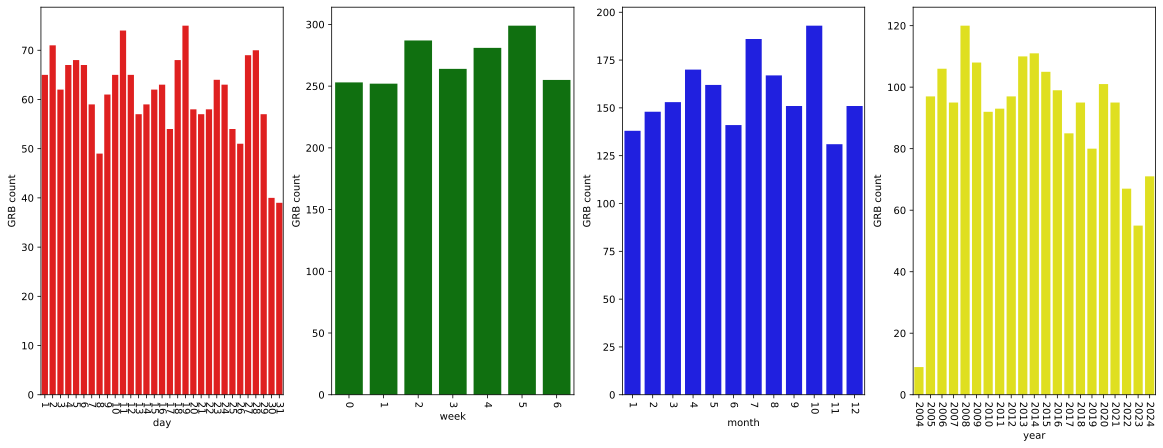

In [10]:
plt.figure(figsize=(20, 7))



plt.subplot(1, 4, 1)
sns.barplot(df.groupby('day')['GRB'].count(), color='red');
plt.ylabel('GRB count');
plt.xticks(rotation=-90);


plt.subplot(1, 4, 2)
sns.barplot(df.groupby('week')['GRB'].count(), color='green');
plt.ylabel('GRB count');
plt.xticks(rotation=-90);


plt.subplot(1, 4, 3)
sns.barplot(df.groupby('month')['GRB'].count(),color='blue');
plt.ylabel('GRB count');
plt.xticks(rotation=-90);


plt.subplot(1, 4, 4)
sns.barplot(df.groupby('year')['GRB'].count(), color='yellow');
plt.ylabel('GRB count');
plt.xticks(rotation=-90);





In [11]:
df['bat_fluence'] = df['bat_fluence'].astype(str)

In [14]:
df['bat_fluence'] = df['bat_fluence'].apply(lambda x: 0 if x == 'nan' or x == 'n/a1.5' or x == '~0.9' else float(x))

In [15]:
df['bat_fluence'].dtypes

dtype('float64')

<Axes: xlabel='bat_fluence', ylabel='Count'>

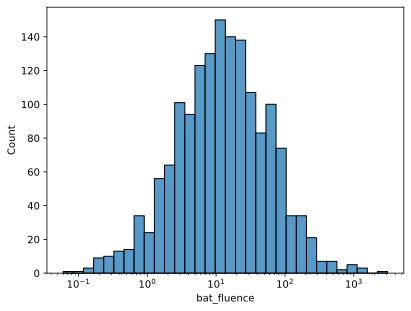

In [16]:
sns.histplot(df['bat_fluence'], log_scale=True)

In [17]:
df

,GRB,Time [UT],Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90 [sec],bat_fluence,XRT RA (J2000),XRT Dec (J2000),XRT Time to First Observation [sec],...,Redshift,Host Galaxy,Comments,References,date,day,month,week,year,day_year
0,241128A,16:14:34,1270999,273.724,33.492,238.32,11.00,18:14:53.72,33:26:20.9,118.05,...,NaN,NaN,UVOT: no detection,NaN,2024-11-28,28,11,3,2024,333
1,241127A,21:43:16,1270788,327.911,-56.652,26.02,6.50,21:51:32.50,-56:39:55.9,66.63,...,NaN,NaN,NaN,NaN,2024-11-27,27,11,2,2024,332
2,241115A,13:18:25,1267921,86.765,-0.662,NaN,0.00,05:47:05.03,-00:40:28.6,109.50,...,NaN,NaN,NaN,NaN,2024-11-15,15,11,4,2024,320
3,241113A,07:48:13,1267501,16.578,-22.658,1.7,1.30,01:06:15.68,-22:40:18.1,77.21,...,NaN,NaN,NaN,NaN,2024-11-13,13,11,2,2024,318
4,241112B,10:57:21,SVOM-ECLAIRs,29.055,9.146,NaN,0.00,01:56:09.39,09:06:27.2,11000,...,NaN,NaN,SVOM-ECLAIRs: GCN 38173,NaN,2024-11-12,12,11,1,2024,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,041220,22:58:27,100433,291.288,60.598,5.600,3.83,NaN,NaN,NaN,...,NaN,NaN,BAT: FRED|No AT slew|XRT: no observation|UVOT:...,NaN,2004-12-20,20,12,0,2004,355
1887,041219C,20:30:34,100380*,343.926,-76.744,4.800,13.10,NaN,NaN,NaN,...,NaN,NaN,BAT: 3 spikes|No AT slew|XRT: no observation|U...,NaN,2004-12-19,19,12,6,2004,354
1888,041219B,15:38:48,100367*,167.674,-33.458,30,0.00,NaN,NaN,NaN,...,NaN,NaN,"BAT: 1 big spike, 3 little spikes|No AT slew|X...",NaN,2004-12-19,19,12,6,2004,354
1889,041219A,01:42:18,100307|100319,6.154,62.847,520,1550.00,NaN,NaN,NaN,...,NaN,NaN,"BAT: bright, long, multipeaked|No AT slew|XRT:...",NaN,2004-12-19,19,12,6,2004,354


In [30]:
print(f'mean {df['bat_fluence'].mean()}' 
      '\n' f'median {df['bat_fluence'].median()}' 
      '\n' f'max {df['bat_fluence'].max()}' 
      '\n' f'min {df['bat_fluence'].min()}')

mean 40.49564118761845
median 13.0
max 3100.0
min 0.06


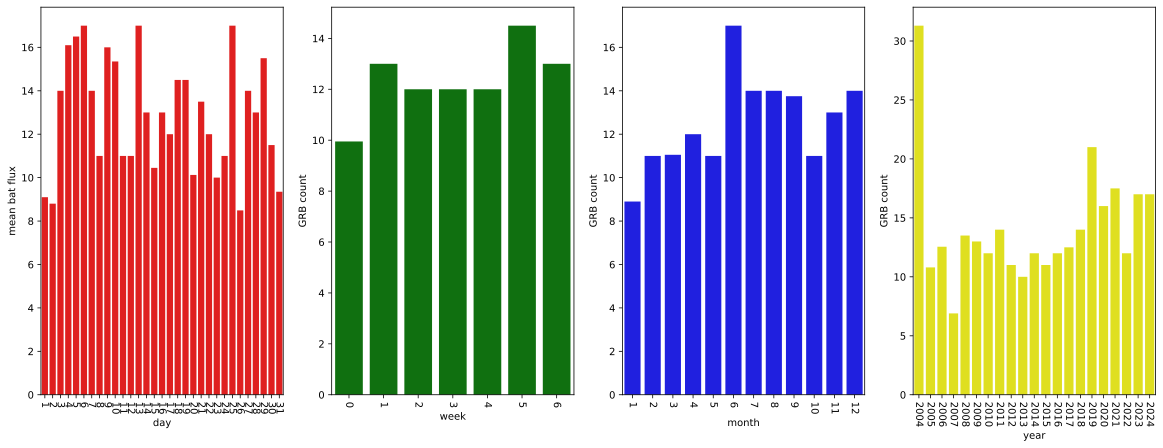

In [31]:
plt.figure(figsize=(20, 7))



plt.subplot(1, 4, 1)
sns.barplot(df.groupby('day')['bat_fluence'].median(), color='red');
plt.ylabel('mean bat flux');
plt.xticks(rotation=-90);


plt.subplot(1, 4, 2)
sns.barplot(df.groupby('week')['bat_fluence'].median(), color='green');
plt.ylabel('GRB count');
plt.xticks(rotation=-90);


plt.subplot(1, 4, 3)
sns.barplot(df.groupby('month')['bat_fluence'].median(),color='blue');
plt.ylabel('GRB count');
plt.xticks(rotation=-90);


plt.subplot(1, 4, 4)
sns.barplot(df.groupby('year')['bat_fluence'].median(), color='yellow');
plt.ylabel('GRB count');
plt.xticks(rotation=-90);

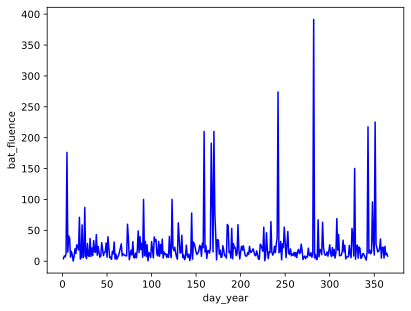

In [37]:
sns.lineplot(df.groupby('day_year')['bat_fluence'].median(), color='blue');